<a href="https://colab.research.google.com/github/ClementeGarcia/Simulaci-n-1/blob/main/Flecha_y_cojinete1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flecha y conjinete

Una flecha será ensamblada en un cojinete como se muestra a continuación


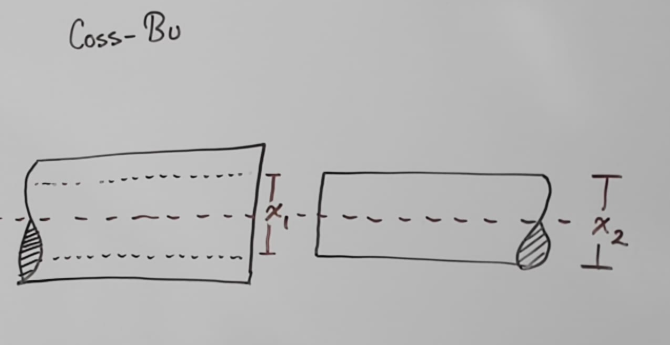


Si $x_1$ sigue una distribución normal con media 1.5 y varianza 0.0016 y $x_2$ sigue esta misma distribución con media 1.48 y varianza 0.0009

###Determine

a) La probabilidad de que haya interferencia

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estamada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del $95\%$

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.



$$x_1 \sim N(1.5, 0.04)$$
$$x_2 \sim N(1.48, 0.03)$$

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right), \quad x \in \mathbb{R}
$$

$$
x_1 \sim f(x) = \frac{1}{(0.04) \sqrt{2\pi}} e^{\left( -\frac{(x - 1.5)^2}{2\cdot 0.0016} \right)}
$$

$$
x_2 \sim f(x) = \frac{1}{(0.03) \sqrt{2\pi}} e^{\left( -\frac{(x - 1.48)^2}{2\cdot 0.0009} \right)}
$$


### 3. Modele las variables aleatorias

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

La variables aleatorias se van a modelar por el Método de Box Muller ya que es mas exacto en cuanto a su simulación ya que se generan dos numeros aleatorios y se retornan dos numeros por lo que es mas efectivo, en cambio si queremos tomar el método de la aproximación solo nos generaria un número aleatorio por lo cual no es muy preciso al igua que el método de las 12 uniformes donde gastamos más recursos ya que se deben gener 12 numeros aleatorios para generar un solo número de la distribució por lo que el método a utilizar y el mas efectivo es el de Box-Muller.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

**La condición de interferencia es la siguiente**

$$x_2 \geq x_1$$

o

$$P(x_2 \geq x_1)$$


### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

**Pseudocódigo**

Generar $R_1$ y $R_2$ $\sim$ $U(0,1)$

Calcular

$Z = \sqrt{-2 * ln(R_1)} * cos(2 * \pi * R_2)$

Transformar

$X = \mu + \sigma * Z$

Retornar X




In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import scipy.stats as stats

In [27]:
def experi(x):
    exitos = 0 # Contador de veces que x2 >= x1
    for i in range(x):
        x1 = np.random.normal(1.5, 0.04,1) # Valor aleatorio de X1 ~ N(1.5, 0.04)
        x2 = np.random.normal(1.48, 0.03,1) # Valor aleatorio de X2 ~ N(1.48, 0.03)
        if x2 >= x1: # Si X2 es mayor o igual que X1, se considera éxito
            exitos += 1
    proba = exitos / x   # Probabilidad estimada del evento X2 >= X1
    return proba
print(experi(100)) # Ejecutar la función  100 veces

0.36


### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

In [28]:
n = 1000  # Número total de simulaciones a realizar
lista = []  # Lista vacía para almacenar
# Ciclo que ejecuta experi(i+1)
for i in range(n):
    lista.append(experi(i + 1))  # Llama a la función experi con i+1 simulaciones y guarda el resultado
print(lista)  # Imprime la lista completa con los resultados de probabilidad acumulados


[0.0, 0.5, 0.0, 0.5, 0.4, 0.3333333333333333, 0.5714285714285714, 0.25, 0.1111111111111111, 0.1, 0.36363636363636365, 0.25, 0.3076923076923077, 0.5714285714285714, 0.6, 0.3125, 0.47058823529411764, 0.4444444444444444, 0.5789473684210527, 0.45, 0.47619047619047616, 0.36363636363636365, 0.30434782608695654, 0.4166666666666667, 0.16, 0.5384615384615384, 0.5185185185185185, 0.42857142857142855, 0.3448275862068966, 0.3333333333333333, 0.41935483870967744, 0.53125, 0.2727272727272727, 0.29411764705882354, 0.2857142857142857, 0.3888888888888889, 0.2972972972972973, 0.39473684210526316, 0.23076923076923078, 0.3, 0.36585365853658536, 0.42857142857142855, 0.23255813953488372, 0.38636363636363635, 0.3111111111111111, 0.32608695652173914, 0.2765957446808511, 0.20833333333333334, 0.24489795918367346, 0.32, 0.2549019607843137, 0.4423076923076923, 0.24528301886792453, 0.4074074074074074, 0.2727272727272727, 0.35714285714285715, 0.2807017543859649, 0.2413793103448276, 0.3728813559322034, 0.31666666666

### 7. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado

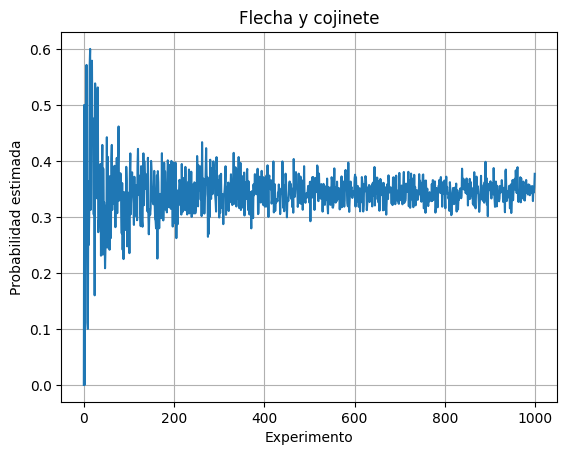

In [29]:
plt.plot(lista) #Gráfica
plt.xlabel('Experimento')
plt.ylabel('Probabilidad estimada')
plt.title('Flecha y cojinete')
plt.grid(True)
plt.show()

# Media simulada

In [30]:
mu = np.mean(lista)

print(mu)

0.3438862422946303


# Varianza simulada

In [31]:
va = np.var(lista)
print(va)

0.001686234613211276


# Desviación estándar simulada

In [32]:
s = np.std(lista)
print(s)

0.04106378712699641


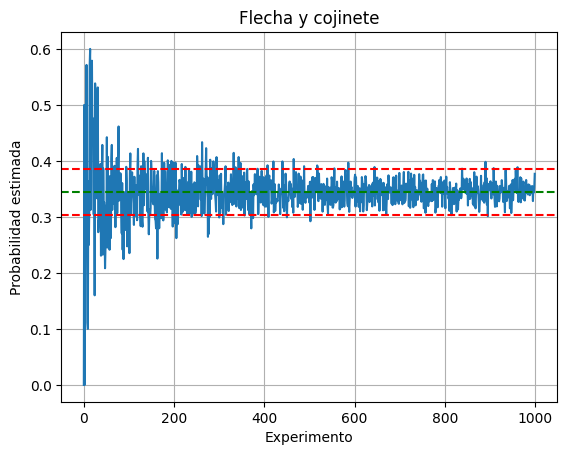

In [33]:
plt.plot(lista) #Gráfica
plt.xlabel('Experimento')
plt.ylabel('Probabilidad estimada')
plt.axhline(mu, color='green',linestyle='--')
plt.axhline(mu+s, color='red',linestyle='--')
plt.axhline(mu-s, color='red',linestyle='--')
plt.title('Flecha y cojinete')
plt.grid(True)
plt.show()

**PASO 8**. Replique el modelo.

In [34]:
def simulacion(repeticiones):
    # Se define una función llamada 'simulacion' que toma como parámetro 'repeticiones',
    # el cual indica cuántas veces se va a repetir el experimento.

    List = []
    # Se crea una lista vacía llamada 'List' para almacenar los resultados promedio de cada experimento.

    for i in range(repeticiones):
        # Se inicia un ciclo que se repetirá 'repeticiones' veces.

        List.append(np.mean(experi(100)))
        # En cada iteración:
        # - Se llama a la función 'experi(1000)', que realiza 1000 simulaciones individuales.
        # - Se obtiene el promedio de los resultados de esa simulación usando np.mean().
        # - El resultado promedio se agrega a la lista 'List'.

    return List
    # Al finalizar todas las repeticiones, se devuelve la lista con todos los promedios obtenidos.


In [35]:
simu = simulacion(1000)

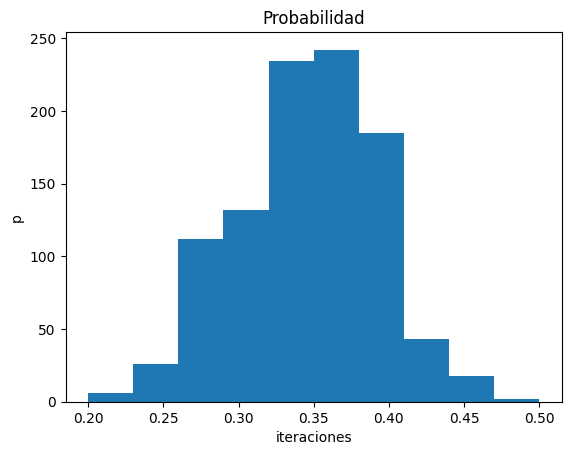

In [36]:
plt.hist(simu) #Gráfica
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()

**PASO 9**. Calcule la probabilidad

In [37]:
m = np.mean(simu)
v = np.var(simu)
st = np.std(simu)


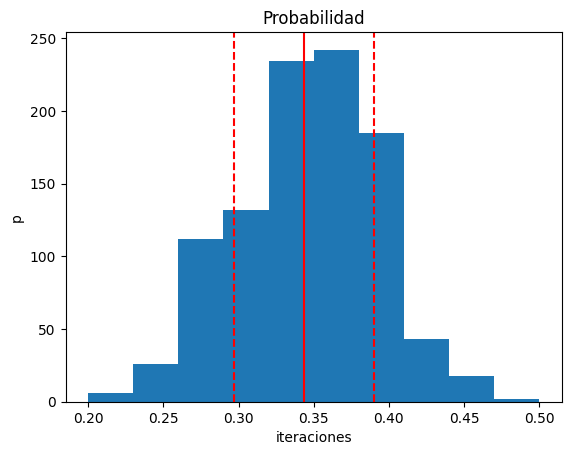

In [38]:
plt.hist(simu) #Gráfica
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.axvline(m, color = "red") #Para la media
plt.axvline(m + st, color = "red", linestyle = "dashed") #Para la media + desviacion
plt.axvline(m - st, color = "red", linestyle = "dashed") #Para la media - desviacion
plt.show()

**PASO 10**. Halle el intervalo de confianza del 95%

# Solución análitica

Con diferencia de Distribuciones

**Tenemos**

$$\mu_1 = 1.5, \text{ } \sigma_1 = 0.04$$

$$\mu_2 = 1.48, \text{ } \sigma_2 = 0.03$$

Definimos $D$ como la diferencia

$$D = x_2 - x_1 $$

$$ \mu = \mu_2 - \mu_1 = 1.48 - 1.5 = -0.02$$

$$\sigma^2 = \sigma_1^2 + \sigma_2^2 = 0.0025$$

$$\sigma = 0.05$$


Tenemos $z \sim N(-0.02, 0.05)$, queremos obtener

$$P(x_2 - x_1 \geq 0) = \int_{0}^{x_2-x_1} \frac{1}{0.05\cdot\sqrt{2\cdot \pi}}\cdot e^{-\frac{(t + 0.02)^2}{2\cdot(0.05)^2}}dt$$


Tenemos $z \sim N(-0.02, 0.05)$, queremos obtener

$$P(x_2 \geq x_1 ) = P(z \geq 0)$$

estandarizamos

$$z = \frac{x - \mu}{\sigma} = \frac{0+0.02}{0.05} = 0.4$$

Calculamos, con ayuda de las tablas  

$$P(z\geq 0.4) = 1 - 0.65542 = 0.34458$$

Por lo que al conocer la varianza y la media vamos a simular el intervalo como una distribución normal ocupando el intervalo de confianza para simularlo

$$
Intervalo = \left( \bar{X} - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}},\; \bar{X} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \right)
$$

In [39]:
p = stats.norm.cdf(0, -0.02, 0.05)
print(1-p)

0.3445782583896758


El **Teorema del Límite Central (TLC)** afirma que, independientemente de la forma de la distribución original de una población (ya sea simétrica o sesgada, discreta o continua), la distribución de la **media muestral** de un número suficientemente grande de variables aleatorias independientes e idénticamente distribuidas (i.i.d.) tiende a ser una distribución normal.



Entonces, la variable aleatoria estandarizada:

$$
Z_n = \frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}}
$$

Sabemos que para grandes $n$, la media muestral se distribuye como:

$$
\bar{X}_n \sim \mathcal{N} \left( \mu, \frac{\sigma^2}{n} \right)
$$

Queremos que:

$$
P\left( |\bar{X}_n - \mu| < \varepsilon \right) \geq 1 - \alpha
$$

Usando la normal estándar:

$$
\varepsilon = z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

Despejando $n$:

$$
n = \left( \frac{z_{\alpha/2} \cdot \sigma}{\varepsilon} \right)^2
$$

Sustitución de valores

$$
n = \left( \frac{1.96 \cdot 0.05}{0.01} \right)^2 = \left( \frac{0.098}{0.01} \right)^2 = (9.8)^2 = 96.04
$$

$$
\Rightarrow n \approx 97
$$

Conclusión

Se requieren al menos $97$ repeticiones del proceso para asegurar, con un nivel de confianza del 95\%, que la media muestral $\bar{X}_n$ se encuentre a menos de $\varepsilon = 0.01$ unidades de la media verdadera $\mu = 0.35$.


In [40]:
from math import ceil
from scipy.stats import norm

# Configuración
z = norm.ppf(0.975)  # Para alpha=0.05 (95% confianza)
n = ceil((z * 0.05 / 0.01) ** 2)  # sigma=0.05, epsilon=0.01

print(f"n mínimo requerido: {n}")

n mínimo requerido: 97


Podemos observar mediante la gráfica y a las ser diferentes pruebas para n simulaciones podemos determinar que n es estable en 100 iteraciones tomando como número entero y como lo vimos analíticamente podemos decir que en 97 iteraciones los valores empiezan a converger. La siguiente imagen es para una simulación de 100

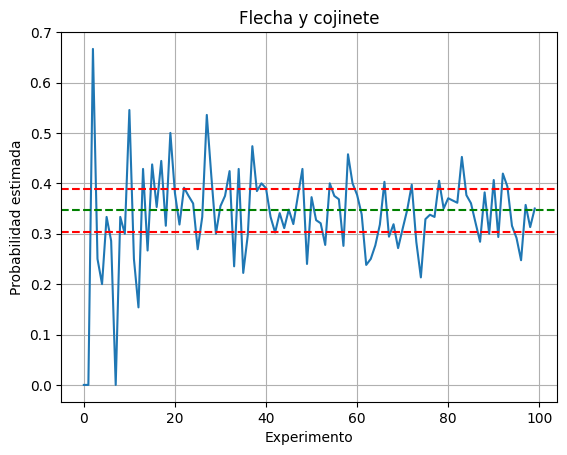

La siguiente es para n = 97 simulaciones por lo que podemos decir que el n correcto donde nuestros valores empiezan a converger al hacer un estudio a pruba y error seria este

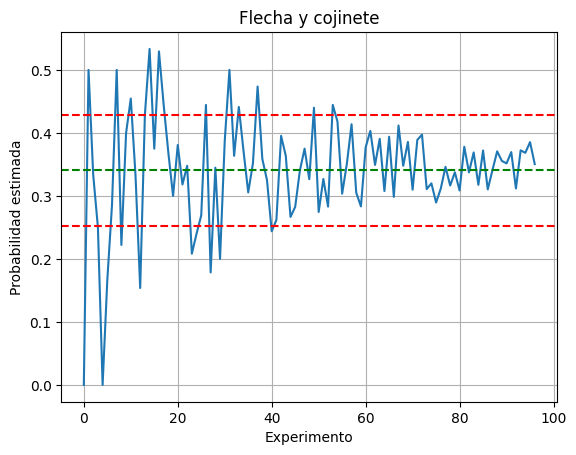